In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from google.colab import drive

In [29]:
df = pd.read_csv('penguins_preprocessed.csv')
df.shape

(300, 10)

In [30]:
# Preprocess the train_df

labels = df['gender']
train_df = df.drop(columns = ['gender'])
train_df = pd.get_dummies(train_df, columns = ['species', 'island'], drop_first = True)
train_df.reset_index()

#Drop columns that don't have correlation to gender
train_df.drop(columns = ['calorie requirement', 'average sleep duration', 'year'], inplace=True)

In [31]:
labels = labels.map({'male': 0, 'female': 1})
print(labels.shape)
labels.head()

(300,)


0    0
1    1
2    1
3    1
4    0
Name: gender, dtype: int64

### Implementation of LogisticRegression

In [32]:
import numpy as np

In [33]:
import random
def split_data(data, target, test_size=0.2, mix=None):
  if mix is not None:
    random.seed(mix)
  shuffled_index = np.random.permutation(data.shape[0])
  count_data = len(data)
  count_train_data = int(count_data * (1-test_size))

  test_index = shuffled_index[count_train_data:]
  train_index = shuffled_index[:count_train_data]
  x_train = data.iloc[train_index]
  x_test = data.iloc[test_index]
  y_train = target.iloc[train_index]
  y_test = target.iloc[test_index]

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data(train_df, labels, test_size = 0.2)

In [34]:
class LogisticRegressionScratch():

  def __init__(self, num_input, lr = 0.01, num_iter = 10000, debug = True):
    self.lr = lr
    self.num_iter = num_iter
    self.w = np.random.rand(num_input)
    self.b = np.random.rand()
    self.loss =[]
    self.acc = []

    if debug:
      print('w =', self.w)

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def cost(self,X,y):
    h = self.forward(X)
    jw = (1/X.shape[0]) * (-y * np.log(h)) - (1 - y) * np.log(1 - h)
    return jw

  def gradient_descent(self, X, y):
    y_pred = self.forward(X)
    delta = y_pred - y
    dw = (x.T @ delta) / x.shape[0]
    dw = dw.squeeze()
    db = delta.mean() #
    self.w = self.w - self.lr * dw
    self.b = self.b - self.lr * db  #

  def forward(self, X):
    return self.sigmoid(X@self.w.T + self.b).reshape(-1,1)

  def fit(self, X, y, plot = True):
    self.loss = []
    self.acc = []
    for i in range(self.num_iter):

      self.gradient_descent(X,y)

      #calculate loss
      loss = self.cost(X,y).mean()
      self.loss.append(loss)
      #calucate accuracy
      y_pred = self.predict(X)
      acc = self.accuracy(y, y_pred)
      self.acc.append(acc)
      #

    if plot:
      plt.plot(self.loss)
      plt.plot(self.acc)
      plt.legend(['Loss', 'Accuracy'], loc='upper right')

  def predict(self, X):
    y_pred = self.forward(X)
    y_pred = np.array([1 if r >= 0.5 else 0 for r in y_pred])
    return y_pred.reshape(-1,1)

  def accuracy(self, y, y_pred):
    total = y.shape[0]
    hit = 0
    for a,b in zip(y, y_pred):
      if a == b: hit += 1

    return (hit / total)


num_input = x_train.shape[1]
cls = LogisticRegressionScratch(num_input, lr = 0.2, num_iter = 8000)

w = [0.40705932 0.42501115 0.90958451 0.3940338  0.48317723 0.67461606
 0.12928947 0.33192187]


0.9


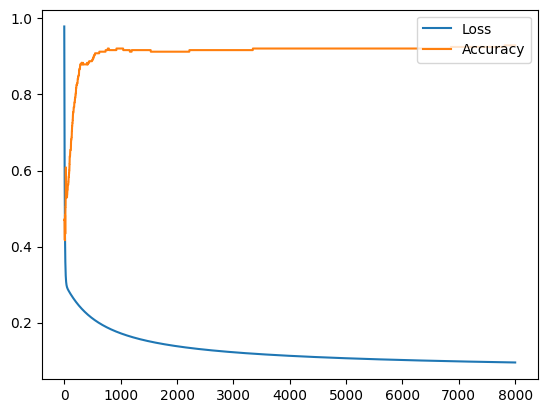

In [35]:
x = np.array(x_train)
y = np.array(y_train).reshape(-1,1)

x_valid = np.array(x_test)
y_valid = np.array(y_test).reshape(-1,1)

# FIT FUNCTION
y_pred = cls.predict(x_valid)
cls.fit(x,y)

y_pred = cls.predict(x_valid)

print(cls.accuracy(y_valid, y_pred))


### References:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
